# WordCloud variations

In [ ]:
#https://amueller.github.io/word_cloud/

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## From simple string / corpus

In [3]:
test_string_1 = "These are the things I am talking about today - turtles, turtle doves, alligators, alligator clips, and maybe if I'm lucky other sewer living creatures"

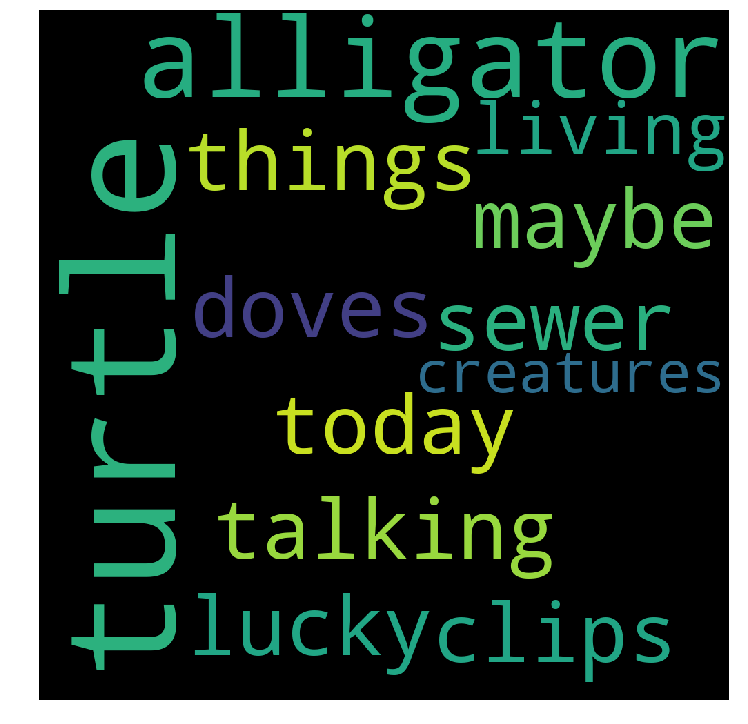

In [9]:
mycloud = WordCloud(width=1000, height=1000,
                    collocations=False, #get rid of duplicates
                   normalize_plurals=True,
                   max_words=len(test_string_1)).generate_from_text(test_string_1)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud)
plt.axis("off")
plt.tight_layout(pad = 0)

## Generate from corpus

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

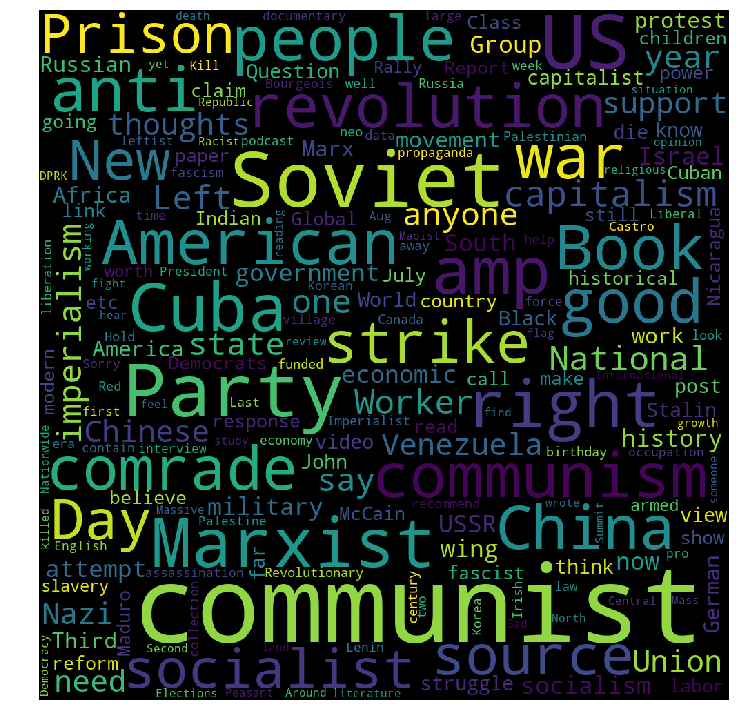

In [5]:
df3 = pd.read_csv('./../Blog_Posts/HUAC 9000/Data/Communism91999.csv')
corpus_string = ''
for i in range(df3.shape[0]):
    corpus_string = corpus_string + df3.iloc[i]['title']

mycloud_2 = WordCloud(width=1000, height=1000,
                    collocations=False, #get rid of duplicates
                   normalize_plurals=True).generate_from_text(corpus_string)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud_2)
plt.axis("off")
plt.tight_layout(pad = 0)

## Generate from logistic regression (i.e. with custom weights)

In [16]:
log_reg_predict_probas = {
    0.9200119571011498: 'plan', 0.9211669441606003: 'americans', 0.9232880195470916: 'presidency', 0.9372728830868112: 'american', 0.9537001104968201: 'federal', 0.9547024296379086: 'voters',
 0.9760098586189271: 'bernie dog',  0.9845996854658801: 'congress', 0.9890863412762834: 'people',  0.9893496364005863: 'manafort',  1.0060938379972262: 'obama', 1.008068542848371: 'john mccain',
 1.0101121409073528: 'hillary clinton',  1.0674986640826678: 'hillary', 1.091210161323053: 'fox', 1.0931415885632183: 'donald trump', 1.1069704423130518: 'fox news', 1.1225167926592103: 'truth',
 1.1299381809216908: 'news', 1.140096560488081: 'election', 1.1448910716121854: 'shickenchit', 1.14951506741368: 'donald', 1.1714521982268888: 'party', 1.1719162277716462: 'impeachment',
 1.187932367577727: 'house', 1.192305777550084: 'clinton', 1.2027461898315968: 'mueller', 1.204229086443322: 'democratic', 1.2068159038271542: 'bernie', 1.2141852363383718: 'corruption',
 1.217290962432202: 'gillum', 1.2324762622248124: '2020', 1.2794761456355195: 'administration', 1.3542110637433282: 'say', 1.3688836753292224: 'john', 1.371078416505043: 'campaign',
 1.4218445680451504: 'white house', 1.4974582169606583: 'cohen', 1.5223255460267908: 'white', 1.5827787064920869: 'beto rourke', 1.6084651237913496: 'beto', 1.6499146917409369: 'gop'}

In [17]:
from math import exp

In [20]:
word_dictionary_transformed = {}
for key in log_reg_predict_probas.keys():
    new_key_= int(exp(key)*2000)
    while new_key_ in word_dictionary_transformed.keys():
        new_key_+=1
        print('    ',new_key_)
    word_dictionary_transformed[new_key_] = log_reg_predict_probas[key]
my_string = ''
for key in word_dictionary_transformed.keys():
    my_string = my_string + key*(str(word_dictionary_transformed[key]) + ' ')
word_dictionary_transformed

{5018: 'plan',
 5024: 'americans',
 5035: 'presidency',
 5106: 'american',
 5190: 'federal',
 5195: 'voters',
 5307: 'bernie dog',
 5353: 'congress',
 5377: 'people',
 5378: 'manafort',
 5469: 'obama',
 5480: 'john mccain',
 5491: 'hillary clinton',
 5816: 'hillary',
 5955: 'fox',
 5967: 'donald trump',
 6050: 'fox news',
 6145: 'truth',
 6190: 'news',
 6254: 'election',
 6284: 'shickenchit',
 6313: 'donald',
 6453: 'party',
 6456: 'impeachment',
 6560: 'house',
 6589: 'clinton',
 6658: 'mueller',
 6668: 'democratic',
 6685: 'bernie',
 6735: 'corruption',
 6756: 'gillum',
 6859: '2020',
 7189: 'administration',
 7747: 'say',
 7861: 'john',
 7879: 'campaign',
 8289: 'white house',
 8940: 'cohen',
 9165: 'white',
 9736: 'beto rourke',
 9990: 'beto',
 10413: 'gop'}

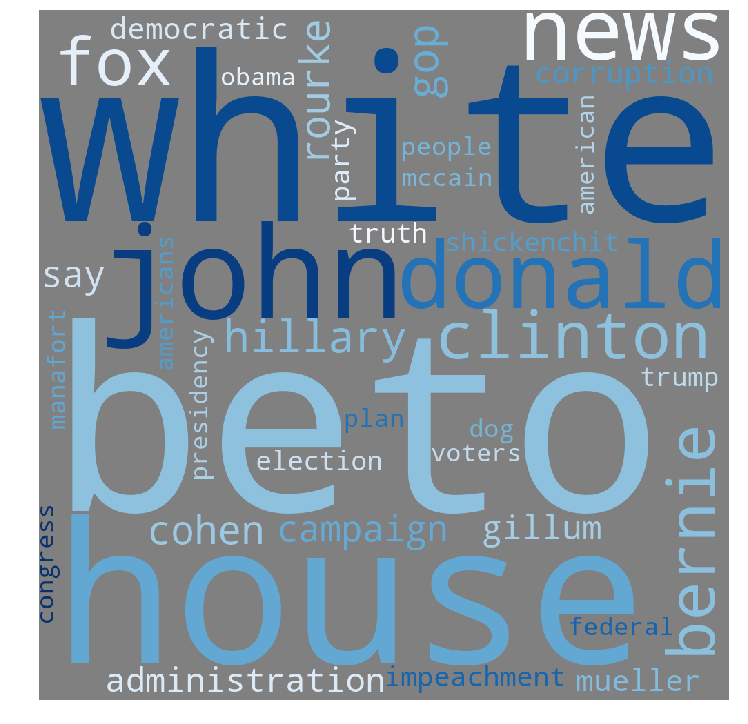

In [21]:
mycloud = WordCloud(width=1000, height=1000,
                    background_color='grey', 
                    min_font_size=1,
                    colormap='Blues',
                    collocations=False, #get rid of duplicates
                   normalize_plurals=False,
                   max_words=len(my_string)).generate_from_text(my_string)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud)
plt.axis("off")
plt.tight_layout(pad = 0)
#mycloud.to_file('./Presentation/OutputFigs/SubredditCloud.png')

## Bonus: Complete Function to Pull Down Subreddit Data and get it to print out a Word Cloud

### Get Base Data

In [27]:
import pandas as pd
import numpy as np
import scipy as sp
import requests
import json
import time
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

In [28]:
def subreddit_getter(subreddit_source, your_name_bot):
    """Subreddit source is the thing you are trying to detect. should be literal string. E.G., /r/football should be input as 'football'
    your_name_bot will be used to associate calls on your machine.
    neutral sub is a sub you believe to not be similar
    """
    data_list = []
    base_url = "https://www.reddit.com/r/" + subreddit_source + "/.json"
    URL = base_url

    #seems to be a cap around 20 for some smaller subs
    for step in range(40):
        try:
            data = requests.get(URL, headers={'User-agent': your_name_bot}).json()

            for i in range(len(data['data']['children'])):
                temp = {}
                temp['subreddit'] = data['data']['children'][i]['data']['subreddit_name_prefixed'].replace('r/', '')
                temp['title']=data['data']['children'][i]['data']['title']
                data_list.append(temp)

            new_after = data['data']['after']
            URL = base_url + "?after=" + new_after
            print('    iteration {} worked. URL: {}'.format(step, URL))
                
            time.sleep(3)  #very important to avoid getting locked out by Reddit.
        except: 
            break
            
    df_scrape = pd.DataFrame(data_list)
    #Ensure unique name
    random_name = subreddit_source + str(randint(100000)) #Avoid writing over previous csvs
    df_scrape.to_csv('./' + random_name + '.csv')
    
    global df_latest_scrape
    df_latest_scrape = df_scrape
    
    print('    text file: ', random_name)
    print('    size: ', df_scrape.shape)



In [29]:
subreddit_getter('all', 'Conor Function Bot')

    iteration 0 worked. URL: https://www.reddit.com/r/all/.json?after=t3_9d4xa3
    iteration 1 worked. URL: https://www.reddit.com/r/all/.json?after=t3_9d53xb
    iteration 2 worked. URL: https://www.reddit.com/r/all/.json?after=t3_9d4pa3
    iteration 3 worked. URL: https://www.reddit.com/r/all/.json?after=t3_9d5cyv
    iteration 4 worked. URL: https://www.reddit.com/r/all/.json?after=t3_9d2xlv
    iteration 5 worked. URL: https://www.reddit.com/r/all/.json?after=t3_9d2b9m
    iteration 6 worked. URL: https://www.reddit.com/r/all/.json?after=t3_9d2d5l
    iteration 7 worked. URL: https://www.reddit.com/r/all/.json?after=t3_9d2x47
    iteration 8 worked. URL: https://www.reddit.com/r/all/.json?after=t3_9d1ur1
    iteration 9 worked. URL: https://www.reddit.com/r/all/.json?after=t3_9d5e9x
    iteration 10 worked. URL: https://www.reddit.com/r/all/.json?after=t3_9d4ta4
    iteration 11 worked. URL: https://www.reddit.com/r/all/.json?after=t3_9d4xw6
    iteration 12 worked. URL: https://

TypeError: randint() missing 1 required positional argument: 'b'

In [26]:
df_latest_scrape.head() #With this new variable you can choose to keep your data in the workbook

,subreddit,title
0,DunderMifflin,How’s my favorite subreddit doing?
1,BlackPeopleTwitter,He stole a grain of sugar and initiated that war.
2,Damnthatsinteresting,Mechanical binary counter.
3,PoliticalHumor,Let’s make this happen
4,nottheonion,Half of Facebook users say they don't understa...


## Using Image Color Template

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [6]:
# Read the whole text.
text = corpus_string
stopwords = set(STOPWORDS)
#stopwords.add("said")

In [ ]:
# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
commie_coloring = np.array(Image.open('./assets/hammer_and_sickle.png'))

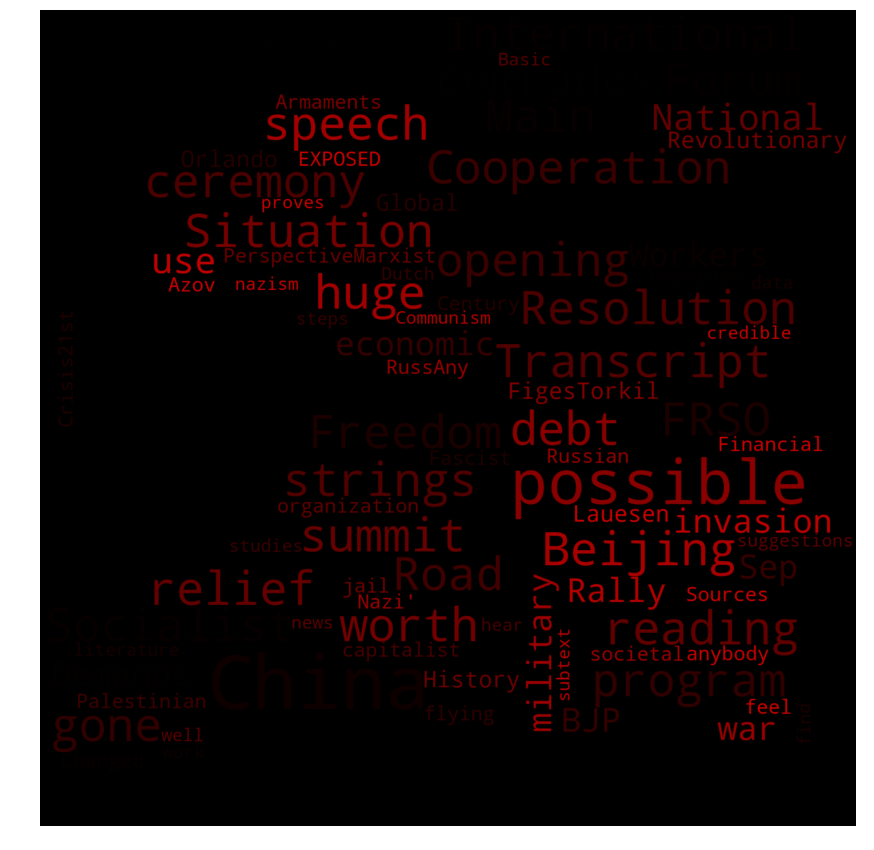

In [37]:
wc = WordCloud(background_color="black", max_words=5000, mask=commie_coloring,
               stopwords=stopwords, contour_width=3, contour_color='steelblue', 
               random_state=42)


# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(commie_coloring)

# show
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,15))
#axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
#axes[2].imshow(commie_coloring, cmap=plt.cm.gray, interpolation="bilinear")
axes.set_axis_off()
plt.show()